In [1]:
# First import necessary modules and initialize BinanceTrader
from binancetrader_class import BinanceTrader  # your existing file
from RSI_MA_strategy_module import TradeConfig, TradingStrategy
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Initialize your trader (assuming you have your credentials file)
filePath = 'envBinance.json'
trader = BinanceTrader(filePath)

Connection successful.


In [3]:
# Update the symbol data
trader.update_ohlc_alltimeframes(symbol='BTCUSDT')

Updating values for symbol: BTCUSDT and timeframe: MN1.
Dados de tempo e colunas iniciadas. Iniciando funcao binance_update_ohlc.
Arquivo ja existe. Lendo o arquivo parquet e iniciando o dataframe.
Diferenca do ultimo registro pra hoje menor que timeframe declarado. Sem updates.
Updating values for symbol: BTCUSDT and timeframe: W1.
Dados de tempo e colunas iniciadas. Iniciando funcao binance_update_ohlc.
Arquivo ja existe. Lendo o arquivo parquet e iniciando o dataframe.
Diferenca do ultimo registro pra hoje menor que timeframe declarado. Sem updates.
Updating values for symbol: BTCUSDT and timeframe: D3.
Dados de tempo e colunas iniciadas. Iniciando funcao binance_update_ohlc.
Arquivo ja existe. Lendo o arquivo parquet e iniciando o dataframe.
Diferenca do ultimo registro pra hoje menor que timeframe declarado. Sem updates.
Updating values for symbol: BTCUSDT and timeframe: D1.
Dados de tempo e colunas iniciadas. Iniciando funcao binance_update_ohlc.
Arquivo ja existe. Lendo o arquiv

In [4]:
# Create configuration for the strategy
config = TradeConfig(
    initial_capital=2000,
    leverage=5,
    base_bet_size=10,
    rsi_period=14,
    rsi_ma_period=14,
    stop_loss_pct=2.0,
    take_profit_pct=4.0,
    risk_per_trade_pct=1.0 # Risk is 1% of the current capital
)

# Initialize the strategy
strategy = TradingStrategy(config)

# Define your backtest period
start_date = datetime(2023, 1, 1)  # Start with a recent period first
end_date = datetime(2024, 11, 23)

# Initialize results storage
monthly_results = []

In [5]:
# Run the backtest
current_date = start_date
while current_date <= end_date:
    month_start = current_date
    month_end = (month_start + timedelta(days=32)).replace(day=1) - timedelta(days=1)
    
    # Get data for the month
    df = trader.read_ohlc(
        symbol='BTCUSDT',
        timeframe='M5',
        initial_date=month_start,
        final_date=month_end
    )
    
    # Calculate RSI using your existing method
    df = trader.calculate_rsi(df, rsi_period=14, ma_type="SMA", ma_period=14)
    
    # Process month
    result = strategy.process_month(df)
    if result:
        result['month'] = month_start.strftime('%Y-%m')
        monthly_results.append(result)
        
    current_date = month_end + timedelta(days=1)

# Convert results to DataFrame
results_df = pd.DataFrame(monthly_results)

# Print summary statistics
print("\nBacktest Results:")
print(f"Total Return: ${results_df['return'].sum():,.2f}")
print(f"Average Monthly Return: ${results_df['return'].mean():,.2f}")
print(f"Average Win Rate: {results_df['win_rate'].mean():.2f}%")
print(f"Average Sharpe Ratio: {results_df['sharpe_ratio'].mean():.2f}")
print(f"Maximum Drawdown: {results_df['max_drawdown'].max():.2f}%")


Backtest Results:
Total Return: $-65.03
Average Monthly Return: $-2.83
Average Win Rate: 68.79%
Average Sharpe Ratio: -0.62
Maximum Drawdown: -0.71%


In [6]:
results_df

,return,trades,win_rate,avg_trade_return,sharpe_ratio,max_drawdown,month
0,-10.364461,912,67.982456,-0.011365,-3.285802,-inf,2023-01
1,-2.305723,801,72.034956,-0.002879,-0.864865,-inf,2023-02
2,-3.909072,891,72.390572,-0.004387,-1.036178,-inf,2023-03
3,-1.984256,835,69.580838,-0.002376,-0.576676,-inf,2023-04
4,15.935192,941,72.263549,0.016934,5.504734,-0.709610,2023-05
5,2.635658,852,70.187793,0.003093,1.104769,-1.931969,2023-06
6,8.134923,896,71.205357,0.009079,4.850300,-0.895857,2023-07
7,9.450960,843,68.208778,0.011211,2.357479,-4.415515,2023-08
8,3.361861,875,70.400000,0.003842,1.802422,-inf,2023-09
9,-7.112939,899,69.966630,-0.007912,-1.563556,-10.983409,2023-10


2024-11-23 17:07:46,151 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-23 17:07:46,154 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


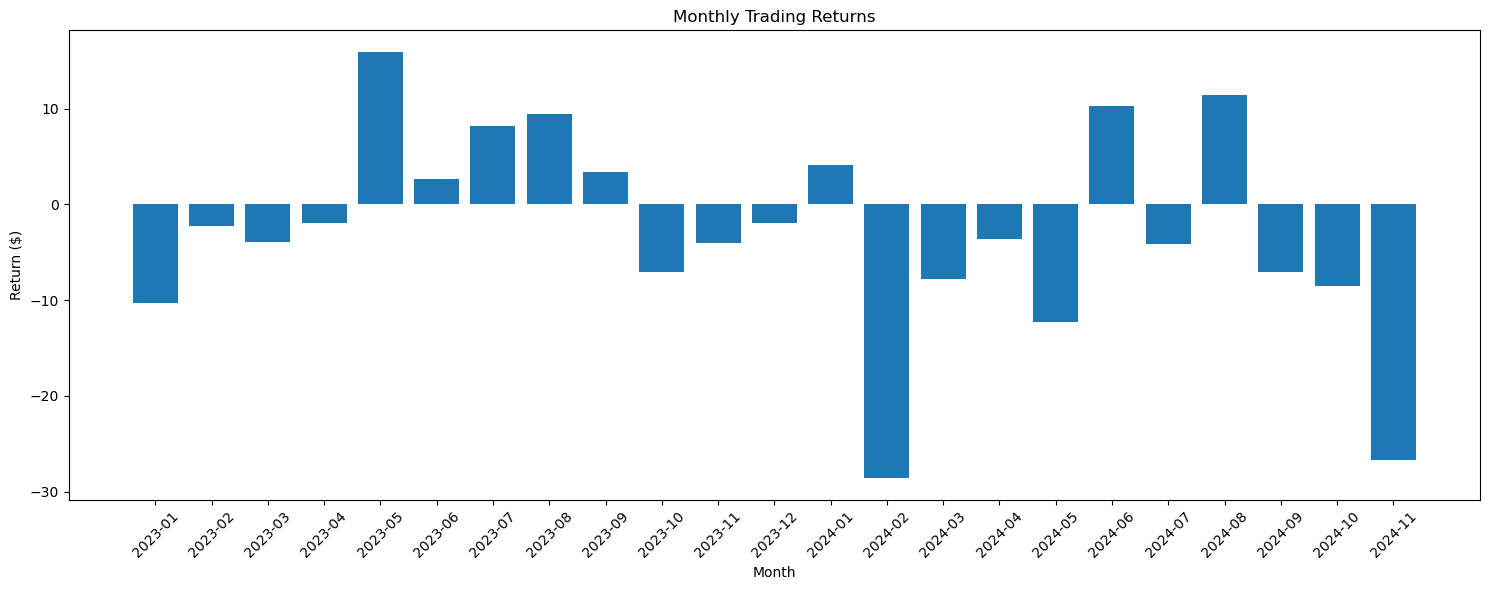

In [7]:
# Plot monthly returns
plt.figure(figsize=(15, 6))
plt.bar(results_df['month'], results_df['return'])
plt.title('Monthly Trading Returns')
plt.xlabel('Month')
plt.ylabel('Return ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2024-11-23 17:07:46,465 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-23 17:07:46,468 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


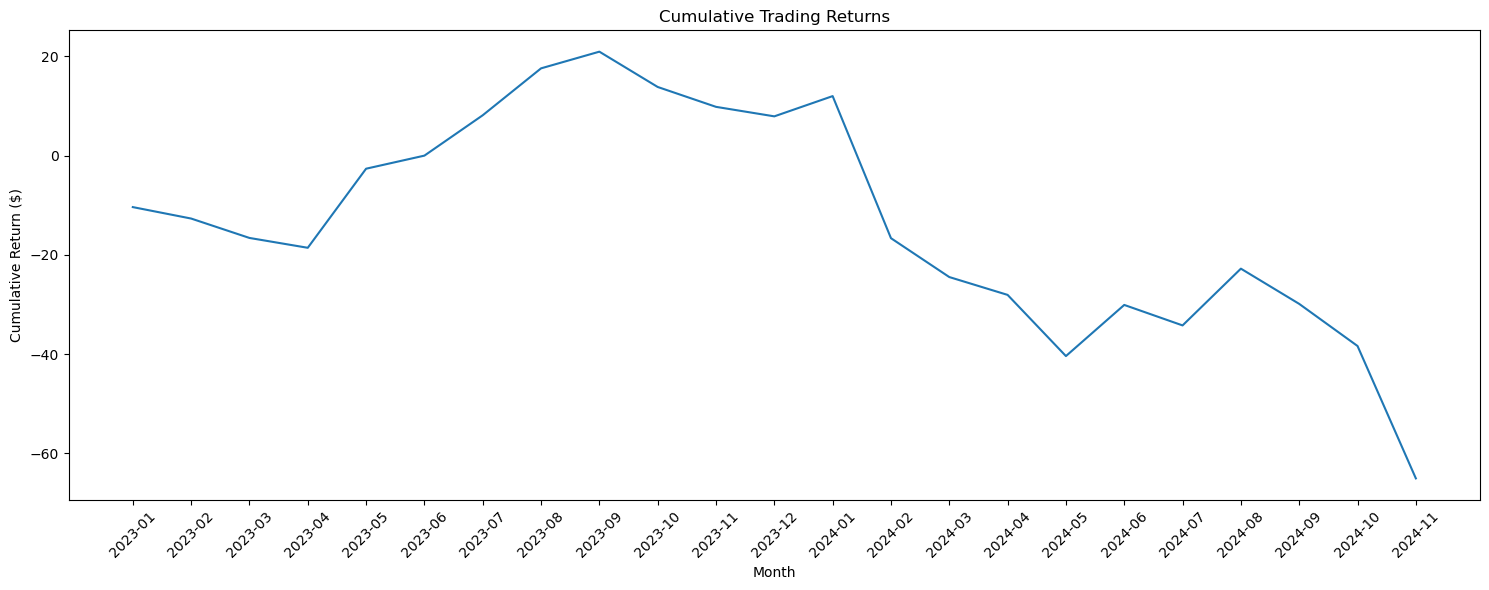

In [8]:
# Plot cumulative returns
plt.figure(figsize=(15, 6))
plt.plot(results_df['month'], results_df['return'].cumsum())
plt.title('Cumulative Trading Returns')
plt.xlabel('Month')
plt.ylabel('Cumulative Return ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()